In [1]:
import yfinance as yf
tickers = ['AAPL', 'MSFT', 'TSLA']
data = yf.download(tickers, start='2015-01-01', end='2023-12-31')
data.head()

[*********************100%***********************]  3 of 3 completed


Price                      Adj Close                            Close  \
Ticker                          AAPL       MSFT       TSLA       AAPL   
Date                                                                    
2015-01-02 00:00:00+00:00  24.373962  40.232853  14.620667  27.332500   
2015-01-05 00:00:00+00:00  23.687304  39.862877  14.006000  26.562500   
2015-01-06 00:00:00+00:00  23.689535  39.277809  14.085333  26.565001   
2015-01-07 00:00:00+00:00  24.021715  39.776840  14.063333  26.937500   
2015-01-08 00:00:00+00:00  24.944683  40.946987  14.041333  27.972500   

Price                                                 High             \
Ticker                          MSFT       TSLA       AAPL       MSFT   
Date                                                                    
2015-01-02 00:00:00+00:00  46.759998  14.620667  27.860001  47.419998   
2015-01-05 00:00:00+00:00  46.330002  14.006000  27.162500  46.730000   
2015-01-06 00:00:00+00:00  45.650002  14.085333  26.857500  46.750000   
2015-01-07 00:00:00+00:00  46.230000  14.063333  27.049999  46.459999   
2015-01-08 00:00:00+00:00  47.590000  14.041333  28.037500  47.750000   

Price                                       Low                        \
Ticker                          TSLA       AAPL       MSFT       TSLA   
Date                                                                    
2015-01-02 00:00:00+00:00  14.883333  26.837500  46.540001  14.217333   
2015-01-05 00:00:00+00:00  14.433333  26.352501  46.250000  13.810667   
2015-01-06 00:00:00+00:00  14.280000  26.157499  45.540001  13.614000   
2015-01-07 00:00:00+00:00  14.318667  26.674999  45.490002  13.985333   
2015-01-08 00:00:00+00:00  14.253333  27.174999  46.720001  14.000667   

Price                           Open                           Volume  \
Ticker                          AAPL       MSFT       TSLA       AAPL   
Date                                                                    
2015-01-02 00:00:00+00:00  27.847500  46.660000  14.858000  212818400   
2015-01-05 00:00:00+00:00  27.072500  46.369999  14.303333  257142000   
2015-01-06 00:00:00+00:00  26.635000  46.380001  14.004000  263188400   
2015-01-07 00:00:00+00:00  26.799999  45.980000  14.223333  160423600   
2015-01-08 00:00:00+00:00  27.307501  46.750000  14.187333  237458000   

Price                                          
Ticker                         MSFT      TSLA  
Date                                           
2015-01-02 00:00:00+00:00  27913900  71466000  
2015-01-05 00:00:00+00:00  39673900  80527500  
2015-01-06 00:00:00+00:00  36447900  93928500  
2015-01-07 00:00:00+00:00  29114100  44526000  
2015-01-08 00:00:00+00:00  29645200  51637500

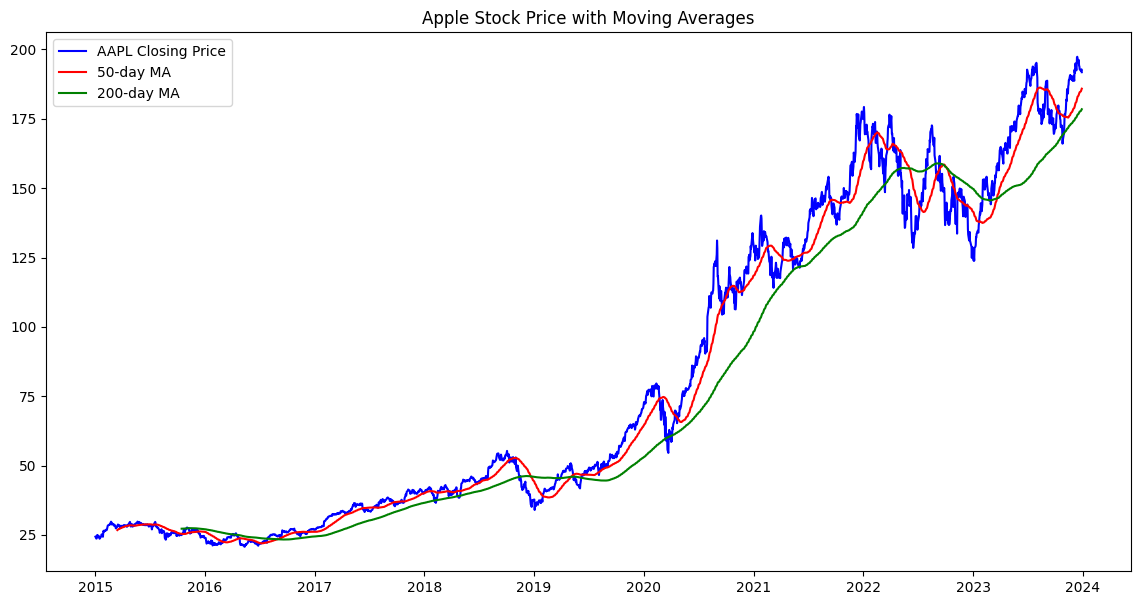

In [2]:
data['AAPL_50_MA'] = data['Adj Close']['AAPL'].rolling(window=50).mean()
data['AAPL_200_MA'] = data['Adj Close']['AAPL'].rolling(window=200).mean()
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
plt.plot(data['Adj Close']['AAPL'], label='AAPL Closing Price', color='blue')
plt.plot(data['AAPL_50_MA'], label='50-day MA', color='red')
plt.plot(data['AAPL_200_MA'], label='200-day MA', color='green')
plt.title('Apple Stock Price with Moving Averages')
plt.legend()
plt.show()

C:\Users\pulla\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pulla\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pulla\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pulla\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is ava

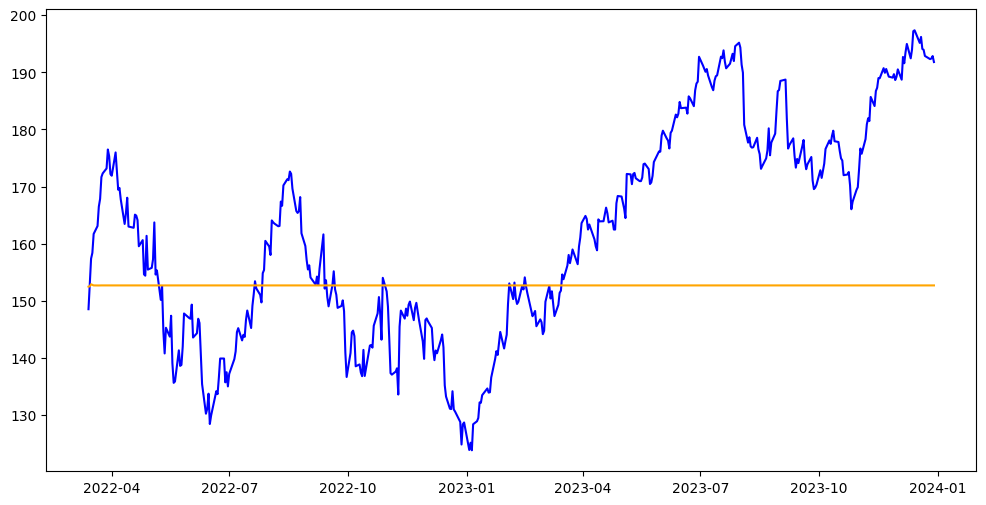

In [3]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
apple_data = data['Adj Close']['AAPL'].dropna()
train_size = int(len(apple_data) * 0.8)
train_data = apple_data[:train_size]
test_data = apple_data[train_size:]
model = ARIMA(train_data, order=(5, 1, 0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test_data))
plt.figure(figsize=(12,6))
plt.plot(test_data.index, test_data, label='Actual Prices', color='blue')
plt.plot(test_data.index, forecast, label='Predicted Prices', color='orange')